In [17]:
import pandas as pd
answers = pd.read_csv("./output/answers.csv")
specs = pd.read_csv("./output/model_specs.csv")
answers.head()
answers.loc[11].answer, answers.loc[5].model_name, 

('Chicago is a city, not a state, so it doesn’t have a governor.\u202fThe chief elected official who runs the city is the **mayor**. As of 2025, the mayor of Chicago is **Brandon Johnson** (he took office on May\u202f15\u202f2023).\n\nIf you were actually asking about the governor of the state in which Chicago is located, that would be the **Governor of Illinois**. The current governor is **J.\u202fB.\u202fPritzker**, who has been in office since January\u202f14\u202f2019 and was re‑elected in 2022.',
 'gpt-oss-120b')

In [5]:
answers.groupby('model_name')['time'].mean()

model_name
Qwen/Qwen2.5-0.5B-Instruct            1.857517
google/gemma-3-270m-it                2.161633
gpt-oss-120b                          0.608020
llama-4-maverick-17b-128e-instruct    0.300791
meta-llama/Llama-3.2-1B-Instruct      1.203500
qwen-3-235b-a22b-instruct-2507        0.600690
Name: time, dtype: float64

,model,model_load_time,mean_answer_time,source,name
0,gpt-oss-120b,NaN,0.608020,api,gpt-oss
1,llama-4-maverick-17b-128e-instruct,NaN,0.300791,api,llama-4
2,qwen-3-235b-a22b-instruct-2507,NaN,0.600690,api,qwen-3
3,google/gemma-3-270m-it,2.077758,2.161633,local,gemma-3
4,Qwen/Qwen2.5-0.5B-Instruct,0.931142,1.857517,local,qwen-2.5
5,meta-llama/Llama-3.2-1B-Instruct,1.096358,1.203500,local,llama-3.2


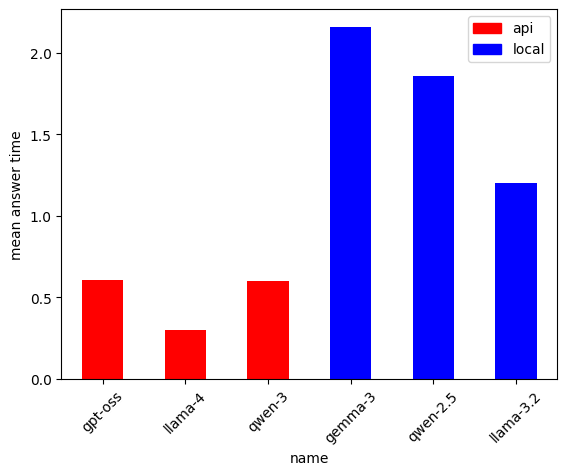

In [6]:
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import pandas as pd
colors = {"api": 'r', "local": 'b'}
handles = [mpatches.Patch(color=colors[i]) for i in colors]
labels = [i for i in colors]
specs.plot.bar(x="name", y="mean_answer_time", rot=45,ylabel="mean answer time", 
               color=[colors[i] for i in specs['source']])
plt.legend(handles, labels)

specs


In [7]:
answers['answer_len'] = answers['answer'].apply(len)

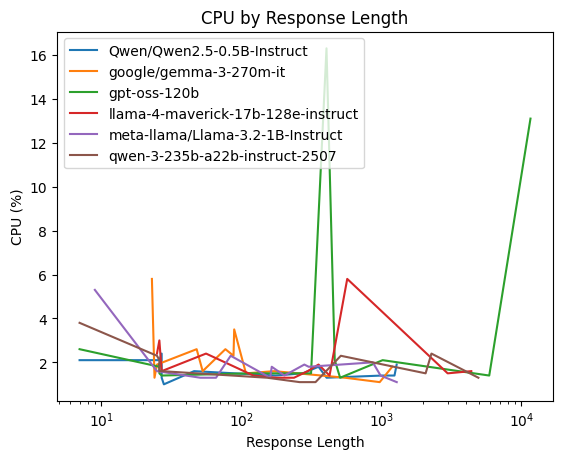

In [8]:
import matplotlib.pyplot as plt
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
cpu_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['cpu'].apply(list)
for idx, val in enumerate(cpu_by_model.values):
    x1 = lens_by_model.values[idx]
    y1 = val
    plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("CPU (%)")
plt.title("CPU by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

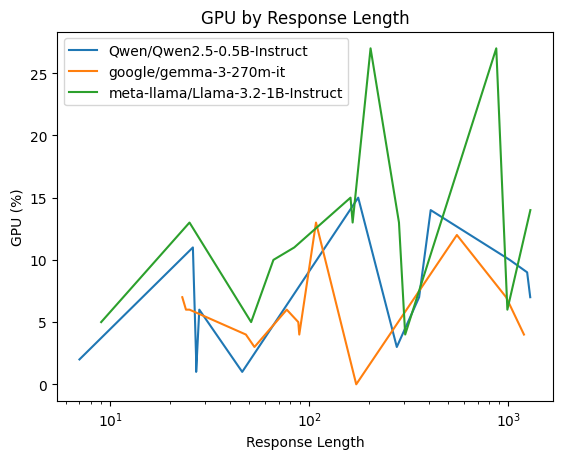

In [9]:
import matplotlib.pyplot as plt
import numpy as np
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
gpu_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['gpu'].apply(list)
for idx, val in enumerate(gpu_by_model.values):
    if np.mean(val) >0:
        x1 = lens_by_model.values[idx]
        y1 = val
        plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("GPU (%)")
plt.title("GPU by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

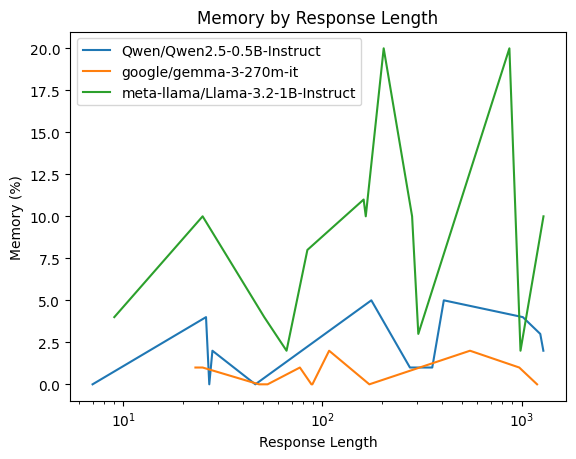

In [10]:
import matplotlib.pyplot as plt
import numpy as np
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
memory_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['memory'].apply(list)
for idx, val in enumerate(memory_by_model.values):
    if np.mean(val) >0:
        x1 = lens_by_model.values[idx]
        y1 = val
        plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("Memory (%)")
plt.title("Memory by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

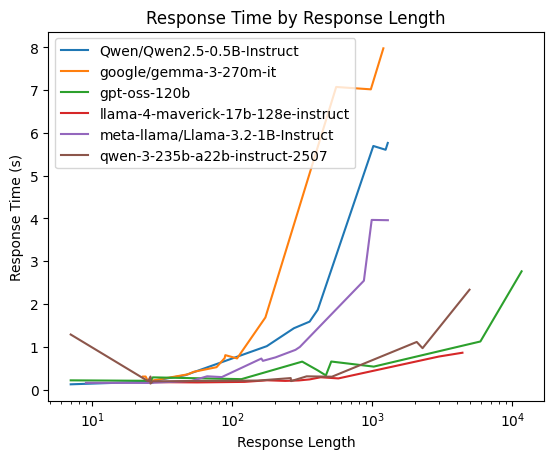

In [11]:
import matplotlib.pyplot as plt
import numpy as np
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
time_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['time'].apply(list)
for idx, val in enumerate(time_by_model.values):
    if np.mean(val) >0:
        x1 = lens_by_model.values[idx]
        y1 = val
        plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("Response Time (s)")
plt.title("Response Time by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()